In [1]:
from jax import random
from phoenix.actionsampling2 import sample_df_potential_soft

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:11: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:39: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
M = 1.0
a = 6.0
b = 0.3

In [3]:
# dein Potential und Parameter
from phoenix.potentials import miyamoto_nagai_potential as Phi
thin = dict(R0=8., Rd=2.6, Sigma0=1e3, RsigR=7., RsigZ=7., sigmaR0_R0=35., sigmaz0_R0=20., L0=50, Rinit_for_Rc=8.)
thick= dict(R0=8., Rd=3.5, Sigma0=3e2, RsigR=9., RsigZ=9., sigmaR0_R0=60., sigmaz0_R0=45., L0=50, Rinit_for_Rc=8.)
params = dict(thin=thin, thick=thick, f_thin=0.7, f_thick=0.3)

theta = (1.0, 6.0, 0.3)  # (M, a, b) z.B. für Miyamoto–Nagai
key = random.PRNGKey(0)


In [4]:
# 1) Soft-Sampling
cands, w, C = sample_df_potential_soft(
    key, Phi, theta, params,
    n_candidates=500_000,
    JR_max=200.0, JZ_max=50.0, JPHI_max=3200.0,
    tau=0.002, envelope_C=0.05  # None → C wird geschätzt
)
print(cands.shape, w.shape, C)
# erklärung: (N,3) Actions, (N,) weiche Gewichte, C ist die Envelope-Konstante


/Users/annalena/miniconda3/envs/phoenix/lib/python3.12/site-packages/jax/_src/interpreters/mlir.py:350: RuntimeWarning: overflow encountered in cast
  return _numpy_array_constant(np.array(val, aval.dtype))


(500000, 3) (500000,) 0.05


In [5]:
import matplotlib.pyplot as plt

JR = cands[:,0]   # erste Spalte: J_R
Jz = cands[:,1]   # zweite Spalte: J_z
Jphi = cands[:,2] # dritte Spalte: J_phi

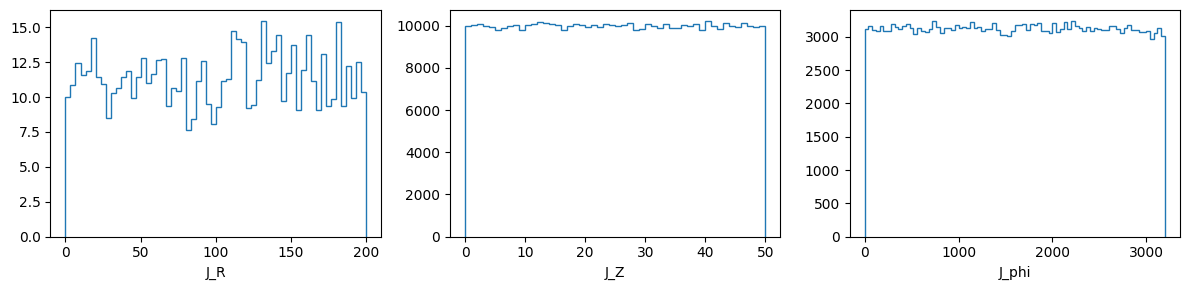

In [6]:
fig, axs = plt.subplots(1,3, figsize=(12,3))

axs[0].hist(JR, bins=60, range=(0,200), weights=w, histtype='step')
axs[0].set_xlabel("J_R")

axs[1].hist(Jz, bins=50, range=(0,50), histtype='step')
axs[1].set_xlabel("J_Z")

axs[2].hist(Jphi, bins=80, range=(0,3200), histtype='step')
axs[2].set_xlabel("J_phi")

plt.tight_layout()
plt.show()

In [7]:
print("sampled actions (JR,Jz,Lz):")
print(JR)
print(Jz)
print(Jphi)

sampled actions (JR,Jz,Lz):
[  1.4587641   4.178238  116.2853    ...  22.813082   66.41305
  29.564262 ]
[ 5.2145185 17.199379   6.553364  ... 42.542503  24.617905  14.610058 ]
[-2671.3357  1797.0375  2804.9912 ...  3177.604   2488.566   2765.0283]


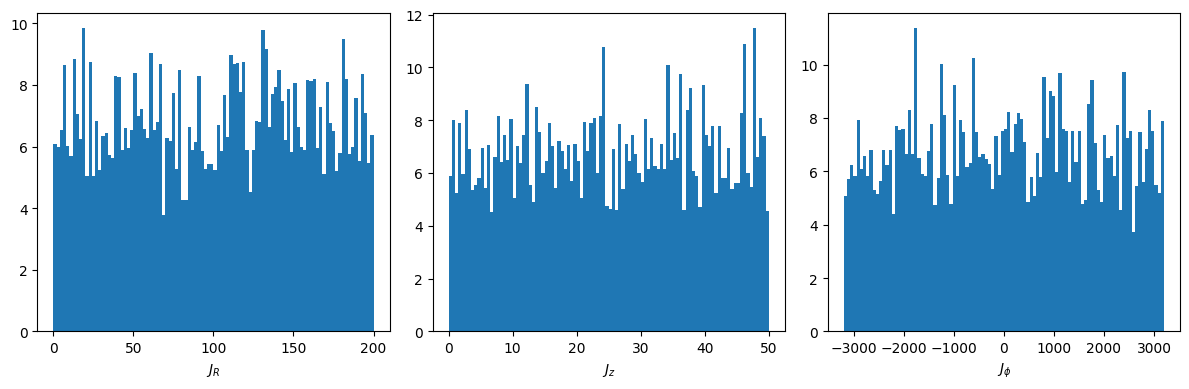

In [8]:
# Plot histograms of the actions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(JR, bins=100, weights=w)#, density=True)
plt.xlabel(r"$J_R$")
plt.subplot(1, 3, 2)
plt.hist(Jz, bins=100, weights=w)#, density=True)
plt.xlabel(r"$J_z$")
plt.subplot(1, 3, 3)
plt.hist(Jphi, bins=100, weights=w)#, density=True)
plt.xlabel(r"$J_\phi$")
plt.tight_layout()
plt.show()

In [9]:
import jax
from phoenix.actiontophasespace import sample_phase_from_actions
from phoenix.potentials import miyamoto_nagai_potential as Phi

/Users/annalena/Documents/GitHub/phoenix/phoenix/actiontophasespace.py:15: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/actiontophasespace.py:68: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechec

In [10]:
# fresh RNG for angles
key = jax.random.PRNGKey(1)
x, y, z, vx, vy, vz = sample_phase_from_actions(
    key, Phi,
    JR, Jz, Jphi,
    M, a, b,              # potential params (*theta) for Phi
    Rinit_for_Rc=8.0,
)


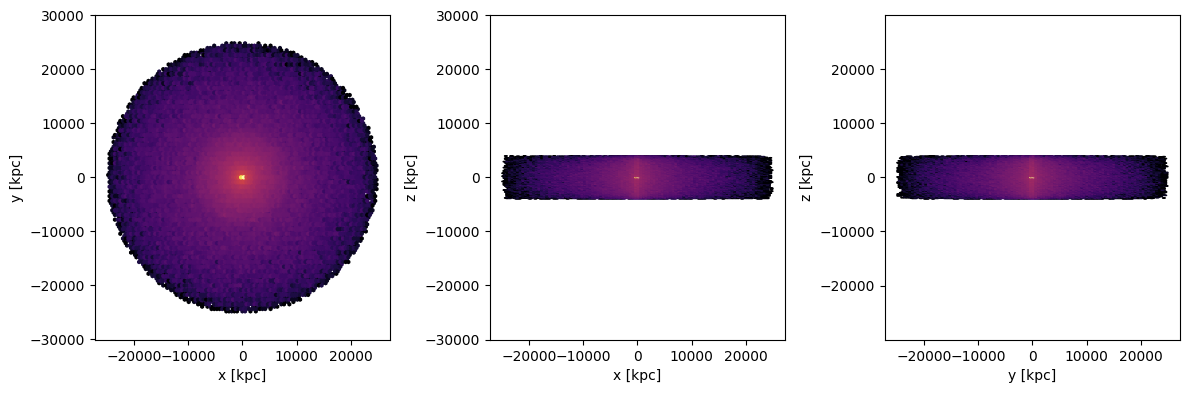

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

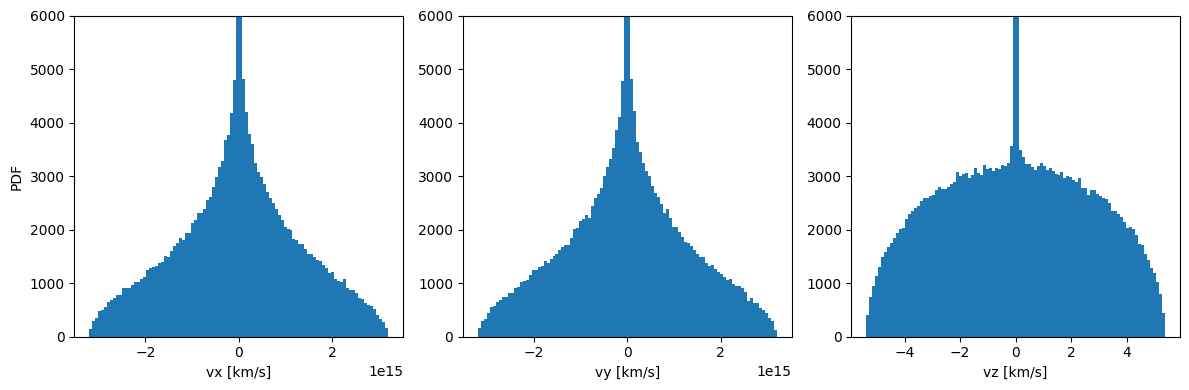

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hist(vx, bins=100, density=False)
plt.xlabel('vx [km/s]')
plt.ylabel('PDF')
plt.ylim(0, 6000)
plt.subplot(132)
plt.hist(vy, bins=100, density=False)
plt.xlabel('vy [km/s]')
plt.ylim(0, 6000)
plt.subplot(133)
plt.hist(vz, bins=100, density=False)
plt.xlabel('vz [km/s]')
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

num_bins_x = 40
num_bins_z = 40 

# Example: x, z, v_y are 1D arrays of particle positions and velocities
# Define bin edges
x_bins = np.linspace(x.min(), x.max(), num_bins_x + 1)
z_bins = np.linspace(z.min(), z.max(), num_bins_z + 1)

# Digitize positions to bin indices
x_idx = np.digitize(x, x_bins) - 1
z_idx = np.digitize(z, z_bins) - 1

# Initialize array for mean v_y
mean_vy = np.full((num_bins_x, num_bins_z), np.nan)

# Calculate mean v_y for each bin
for i in range(num_bins_x):
    for j in range(num_bins_z):
        mask = (x_idx == i) & (z_idx == j)
        if np.any(mask):
            mean_vy[i, j] = np.mean(vy[mask])

# Plot with imshow
plt.imshow(mean_vy.T, origin='lower', aspect='auto',
           extent=[x_bins[0], x_bins[-1], z_bins[0], z_bins[-1]],
           cmap='RdBu')#, vmin = np.percentile(mean_vy, 0.001), vmax = np.percentile(mean_vy, 99.999))
plt.xlabel('x')
plt.ylabel('z')
plt.title('Mean $v_y$ (Line-of-Sight Velocity)')
plt.colorbar(label='Mean $v_y$')
plt.show()

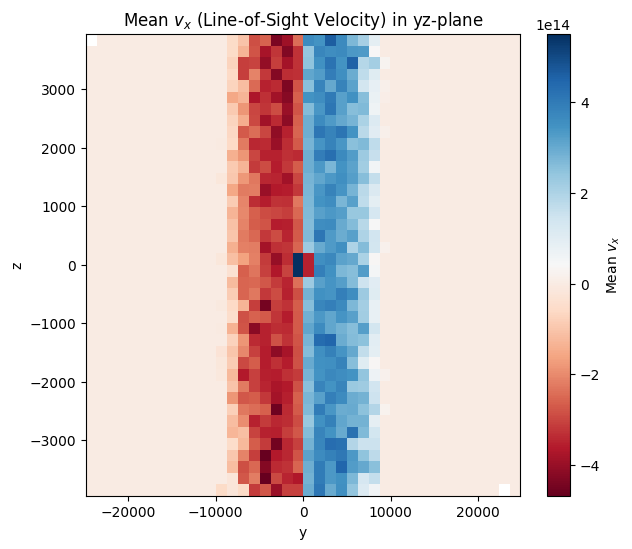

In [ ]:
# Plot mean line-of-sight velocity (mean vx) in the yz-plane
num_bins_y = 40
num_bins_z = 40

y_bins = np.linspace(y.min(), y.max(), num_bins_y + 1)
z_bins = np.linspace(z.min(), z.max(), num_bins_z + 1)

y_idx = np.digitize(y, y_bins) - 1
z_idx = np.digitize(z, z_bins) - 1

mean_vx = np.full((num_bins_y, num_bins_z), np.nan)

for i in range(num_bins_y):
    for j in range(num_bins_z):
        mask = (y_idx == i) & (z_idx == j)
        if np.any(mask):
            mean_vx[i, j] = np.mean(vx[mask])

plt.figure(figsize=(7, 6))
plt.imshow(mean_vx.T, origin='lower', aspect='auto',
           extent=[y_bins[0], y_bins[-1], z_bins[0], z_bins[-1]],
           cmap='RdBu')
plt.xlabel('y')
plt.ylabel('z')
plt.title('Mean $v_x$ (Line-of-Sight Velocity) in yz-plane')
plt.colorbar(label='Mean $v_x$')
plt.show()

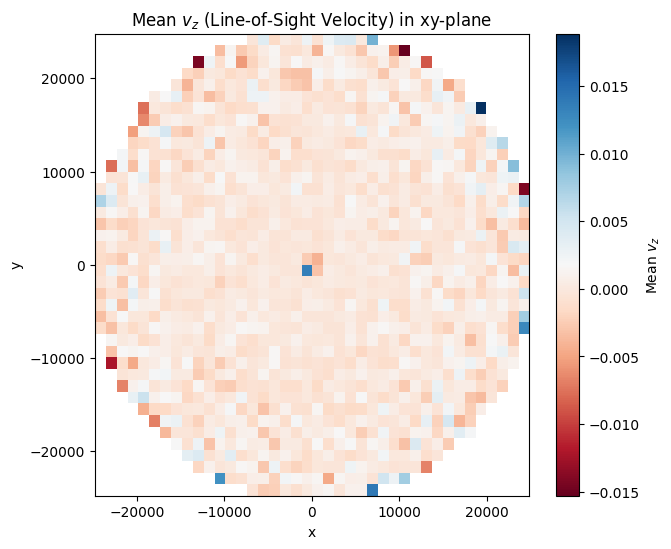

In [ ]:
# Plot mean line-of-sight velocity (mean vz) in the xy-plane
num_bins_x = 40
num_bins_y = 40

x_bins = np.linspace(x.min(), x.max(), num_bins_x + 1)
y_bins = np.linspace(y.min(), y.max(), num_bins_y + 1)

x_idx = np.digitize(x, x_bins) - 1
y_idx = np.digitize(y, y_bins) - 1

mean_vz = np.full((num_bins_x, num_bins_y), np.nan)

for i in range(num_bins_x):
    for j in range(num_bins_y):
        mask = (x_idx == i) & (y_idx == j)
        if np.any(mask):
            mean_vz[i, j] = np.mean(vz[mask])

plt.figure(figsize=(7, 6))
plt.imshow(mean_vz.T, origin='lower', aspect='auto',
           extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
           cmap='RdBu')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mean $v_z$ (Line-of-Sight Velocity) in xy-plane')
plt.colorbar(label='Mean $v_z$')
plt.show()